# EDA

### IMPORTING NECESSARY LIBRARIES 

The libraries needed to perform the exploratory data analysis (EDA) and the required visualizations are imported.

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from src.database.db_conection import connect_db

The libraries used are: sys and os: They allow the manipulation of system paths to manage the import of external modules.
pandas and numpy: Used for data manipulation and analysis, providing efficient structures for handling large volumes of information.
seaborn and matplotlib.pyplot: Key tools for data visualization, allowing the creation of statistical graphs and visual representations of the analyzed metrics. connect_db (from src.database.db_connection): Function used to establish the connection with the database, from where the data will be extracted for analysis and visualization.

In [2]:
engine = connect_db()

Establishes a connection to the database using SQLAlchemy, an ORM (Object Relational Mapper) widely used in data analysis environments. 

This function, located in src.database.db_connection, is responsible for establishing the connection to the database engine. a engine variable stores the connection object returned by connect_db().
This object will allow the execution of SQL queries and interaction with the database from Python.

In [3]:
df = pd.read_sql_query('SELECT * FROM "rawCandidates"', engine)
print(df.head())

   First Name   Last Name                      Email Application Date  \
0  Bernadette   Langworth        leonard91@yahoo.com       2021-02-26   
1      Camryn    Reynolds        zelda56@hotmail.com       2021-09-09   
2       Larue      Spinka   okey_schultz41@gmail.com       2020-04-14   
3        Arch      Spinka     elvera_kulas@yahoo.com       2020-10-01   
4       Larue  Altenwerth  minnie.gislason@gmail.com       2020-05-20   

   Country  YOE  Seniority                         Technology  \
0   Norway    2     Intern                      Data Engineer   
1   Panama   10     Intern                      Data Engineer   
2  Belarus    4  Mid-Level                     Client Success   
3  Eritrea   25    Trainee                          QA Manual   
4  Myanmar   13  Mid-Level  Social Media Community Management   

   Code Challenge Score  Technical Interview Score  
0                     3                          3  
1                     2                         10  
2          

A connection to the database is established and the data stored in the rawCandidates table is extracted. A dataframe is created to start manipulating the data. In addition to view the first rows of the datset.

#### Types of data and descriptive analysis 

In [4]:
df.count()

First Name                   50000
Last Name                    50000
Email                        50000
Application Date             50000
Country                      50000
YOE                          50000
Seniority                    50000
Technology                   50000
Code Challenge Score         50000
Technical Interview Score    50000
dtype: int64

The results show that all columns contain exactly 50,000 records, indicating that there are no missing values in the data set. This assures us of the integrity of the data before proceeding with analysis and visualization.

### number of columns and rows in rawCandidates?

In [5]:
df.shape

(50000, 10)

The result indicates that the dataset contains 50,000 records (rows) and 10 attributes (columns).

### Null data 

In [6]:
print(df.isnull().sum())

First Name                   0
Last Name                    0
Email                        0
Application Date             0
Country                      0
YOE                          0
Seniority                    0
Technology                   0
Code Challenge Score         0
Technical Interview Score    0
dtype: int64


There are no null values in the dataset, it is not necessary to apply cleaning strategies such as row deletion, imputation with means or modes, or other missing data management techniques.

### Types of data

In [7]:
print(df.dtypes)

First Name                   object
Last Name                    object
Email                        object
Application Date             object
Country                      object
YOE                           int64
Seniority                    object
Technology                   object
Code Challenge Score          int64
Technical Interview Score     int64
dtype: object


There are two main data types in the dataset: object, which are text strings, used in columns such as names, e-mails, technologies, application date, country and seniority. int64: Integer values, used in numeric columns such as years of experience (YOE) and evaluation scores.

On the other hand, it is recommended to change the type of data in Application Date to datetime data because it is a column that stores dates.

### change of data type from Applicate Date column to date type 


In [8]:
df["Application Date"] = pd.to_datetime(df["Application Date"])

### Duplicate rows

In [9]:
duplicate_rows_df = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 10)


The duplicate analysis confirms that the dataset does not contain duplicate records. This is essential to ensure data quality and avoid bias in subsequent analyses.

### Descriptive analysis of object type 

In [10]:
print(df.describe(include="object"))

       First Name Last Name                 Email Country Seniority  \
count       50000     50000                 50000   50000     50000   
unique       3007       474                 49833     244         7   
top         Sarai   Murazik  marianne31@yahoo.com  Malawi    Intern   
freq           33       138                     3     242      7255   

              Technology  
count              50000  
unique                24  
top     Game Development  
freq                3818  


A descriptive analysis of the categorical variables was performed to understand their distribution and frequency. It was found that in the “Seniority” column there are 7 categories, while in “Technology” there are 24. It was noted that some emails are repeated, which could indicate that the same candidate applied more than once. This raises the need for a more detailed review to verify whether these are duplicate applications or a possible error in the data.

### Duplicate email analysis 

In [11]:
email_counts = df["Email"].value_counts()
most_common_email = email_counts.idxmax()
most_common_email_count = email_counts.max()
duplicate_candidates = df[df["Email"] == most_common_email]
print(duplicate_candidates)


      First Name Last Name                 Email Application Date    Country  \
3927     Arielle    Harris  marianne31@yahoo.com       2021-05-04    Morocco   
19463   Tristian   Quitzon  marianne31@yahoo.com       2021-04-13      Niger   
30935        Tod   Kuhlman  marianne31@yahoo.com       2019-11-17  Gibraltar   

       YOE  Seniority                         Technology  \
3927    29       Lead                Security Compliance   
19463   13       Lead                Security Compliance   
30935   11  Architect  Social Media Community Management   

       Code Challenge Score  Technical Interview Score  
3927                      2                          1  
19463                     1                          7  
30935                     2                          2  


Registrations with the same e-mail address were identified, but when analyzing the data, it is observed that they correspond to different names, dates of application and countries. This indicates that they are not the same candidate, but different people using the same e-mail address. 

In [12]:
duplicates = df[df.duplicated(subset=['First Name', 'Last Name', 'Email'], keep=False)]

if not duplicates.empty:
    print("Duplicate candidates found:")
    print(duplicates)
else:
    print("No duplicate candidates.")


No duplicate candidates.


No duplicate candidates were found based on the combination of first name, last name and e-mail. However, repeated emails were identified in different records. This is because the dataset was generated randomly and not with real data, which may cause repetitions in certain fields without necessarily representing genuine duplications of candidates.

### summary description of numeric and datetime columns

In [13]:
df.describe().T 

,count,mean,min,25%,50%,75%,max,std
Application Date,50000,2020-04-03 23:04:14.592000,2018-01-01 00:00:00,2019-02-17 00:00:00,2020-04-06 00:00:00,2021-05-21 00:00:00,2022-07-04 00:00:00,NaN
YOE,50000.0,15.28698,0.0,8.0,15.0,23.0,30.0,8.830652
Code Challenge Score,50000.0,4.9964,0.0,2.0,5.0,8.0,10.0,3.166896
Technical Interview Score,50000.0,5.00388,0.0,2.0,5.0,8.0,10.0,3.165082


According to the table below, we can see the main statistics that can give us an idea of how the data behave.

The average number of years of experience is approximately 15 years, and the minimum is 0 years of experience and the maximum is 30 years, The standard deviation suggests a moderate level of dispersion in the data.

In Code Challe Score, we know that it is a qualification note so we know the ranges from 0-10, we know that there are candidates who scored 0 points and candidates who did tests with perfect qualification in this capom, and there is still a little dispersion of the data by the range of the data, also we can say the same in the Techical intervoew score test, the only one that there are differest values but very close almost equal is the average that in COde challege e is 4.99 and the tecnical intevie is 5.0. On the other hand the applications of the data in the column of Application date has as first regitro in 2018-01-01 until 2022-07-04.

### conclusions:

After the descriptive analysis performed, it was identified that the rawCandidates table does not contain null values or completely duplicated rows. However, duplications were detected in some emails. This is due to the fact that the data was generated randomly, which caused the repetition of certain emails without implying the presence of duplicate candidates, since the first and last names are not repeated.

In addition, a change was made to the data type of the Date of Application column, which was originally in object format (text string). To facilitate its analysis and allow operations with dates, it was converted to datetime. This made it possible to calculate statistics such as minimum and maximum request date.

Several key conclusions can be drawn from the descriptive analysis of the data:

Years of experience (YOE): the average experience is approximately 15 years, with a minimum of 0 years and a maximum of 30 years. This suggests that there is considerable diversity in candidate experience.
Technical test scores: Both the Code Challenge and technical interview scores range from 0 to 10, with means close to 5 and a slight spread in the data. This indicates that there are candidates with low, average and perfect scores.
Application Dates: The job applications span more than four years, suggesting that the data includes records from multiple hiring periods.

## visualizations: 

### Histograms of Dataset Features

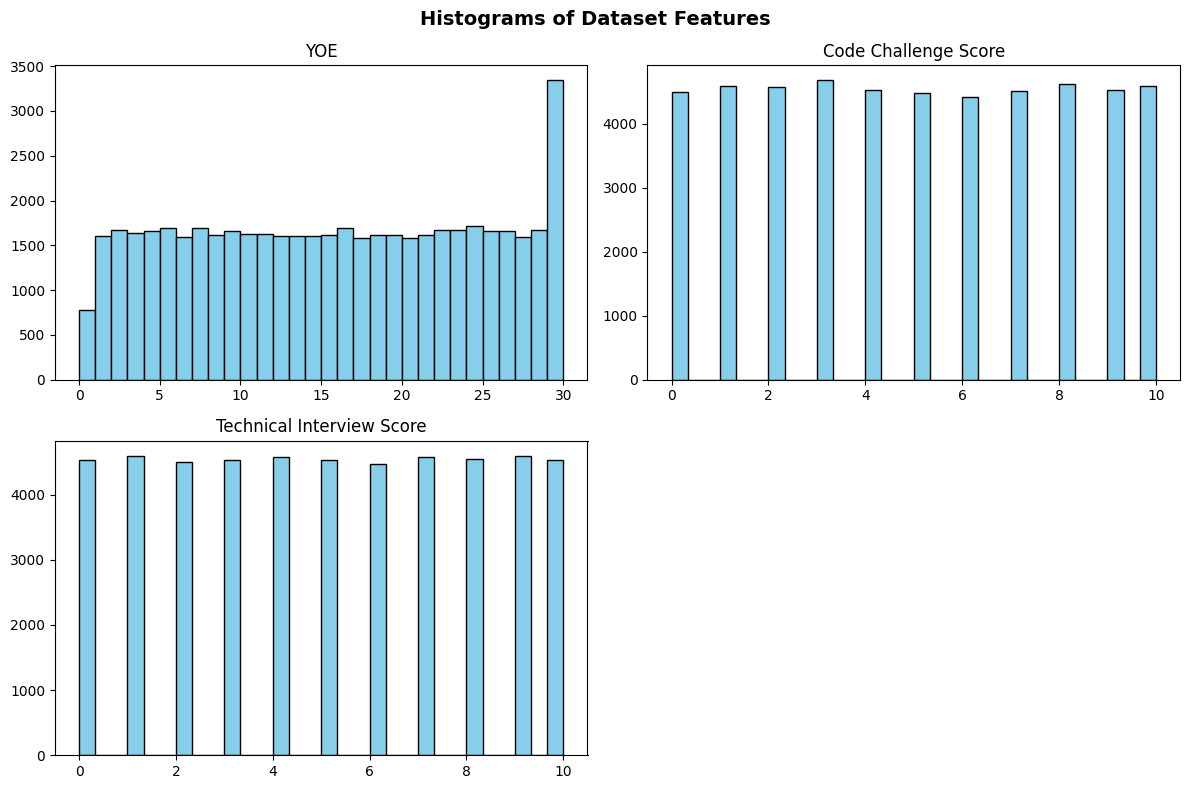

In [14]:

df_filtered_without_ApplicationDate= df.drop(columns=["Application Date"])


df_filtered_without_ApplicationDate.hist(figsize=(12, 8), bins=30, color="skyblue", edgecolor="black", grid=False)

plt.suptitle("Histograms of Dataset Features", fontsize=14, fontweight="bold")
plt.tight_layout()

plt.show()




From the histograms, it can be seen that the majority of candidates have between 29 and 30 years of experience, with more than 3000 people in this category, while the number of inexperienced candidates is lower, with less than 1000 records. Between 1 and 28 years, the distribution is fairly even, with values ranging between 1500 and 1800 candidates per year. As for the scores on the code test and the technical interview, both present a uniform distribution in the range of 0 to 10, indicating that there are no biases in the scoring. In general, the data show a high concentration of profiles with extensive work experience, while performance in the technical tests is well distributed among the candidate

### Applications Over the Years

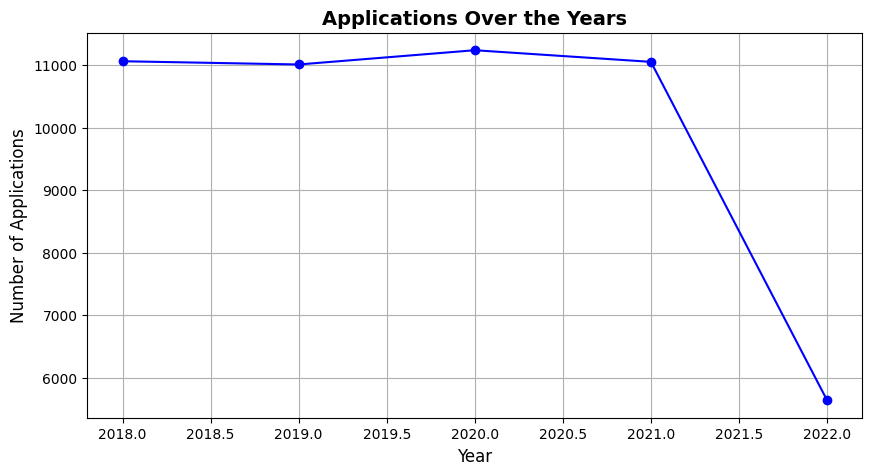

In [15]:

applications_per_year = df["Application Date"].dt.year.value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(applications_per_year.index, applications_per_year.values, marker='o', linestyle='-', color='b')

plt.xlabel("Year", fontsize=12)
plt.ylabel("Number of Applications", fontsize=12)
plt.title("Applications Over the Years", fontsize=14, fontweight="bold")
plt.grid(True)
plt.show()


The graph shows the evolution of the number of applications over the years. It shows that between 2018 and 2021, the number of applications remained relatively stable, with values close to 11,000 candidates per year and a slight increase in 2020. However, in 2022, there was a significant drop in the number of applications, drastically reducing to less than 6,000. 

### Boxplot of Years of Experience

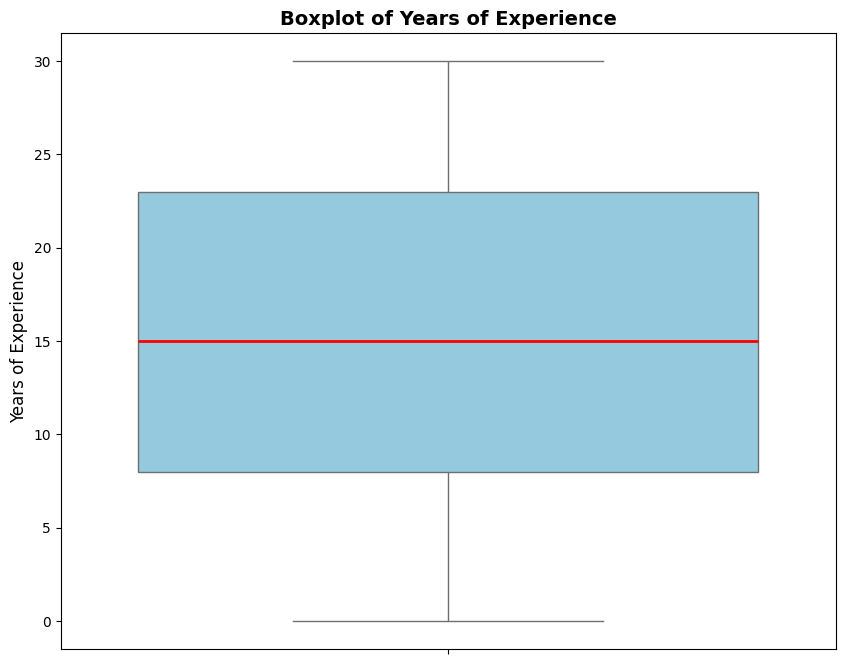

In [16]:
plt.figure(figsize=(10, 8))
sns.boxplot(y=df["YOE"], color="skyblue", medianprops={"color": "red", "linewidth": 2})

plt.title("Boxplot of Years of Experience", fontsize=14, fontweight="bold")
plt.ylabel("Years of Experience", fontsize=12)

plt.show()

The years of experience boxplot shows that the median is approximately 15 years, indicating that half of the candidates have 15 years or less experience, while the other half have more. In addition, no outliers are observed, with no extremely high or low values.

### Boxplot of Code Challenge Score & Technical Interview Score

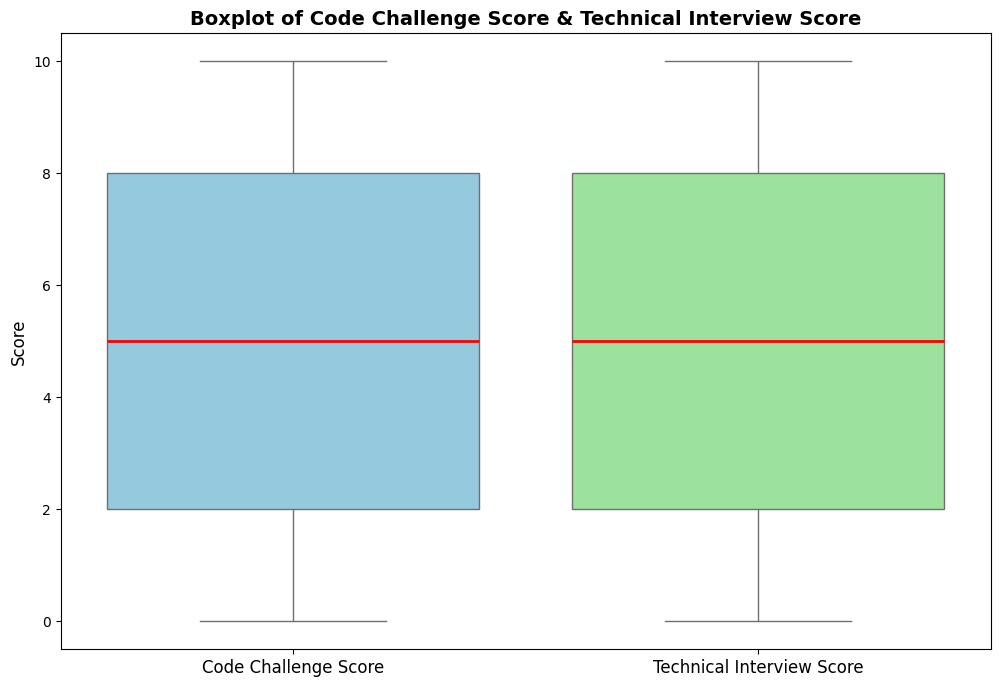

In [17]:
plt.figure(figsize=(12, 8))

sns.boxplot(data=df[["Code Challenge Score", "Technical Interview Score"]], 
            palette=["skyblue", "lightgreen"], 
            medianprops={"color": "red", "linewidth": 2})
plt.title("Boxplot of Code Challenge Score & Technical Interview Score", fontsize=14, fontweight="bold")
plt.ylabel("Score", fontsize=12)
plt.xticks(fontsize=12)

plt.show()

The boxplot shows the distribution of the “Code Challenge” and “Technical Interview” scores, where the median of both tests is approximately 5. Since the values are within the defined range of 0 to 10 and no outliers are observed, it can be concluded that the dispersion of the data is uniform and does not present extreme values that affect the analysis.

### Top 10 Countries with More Candidates

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19384\1594770149.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_ten_countries.values, y=top_ten_countries.index, palette="viridis")


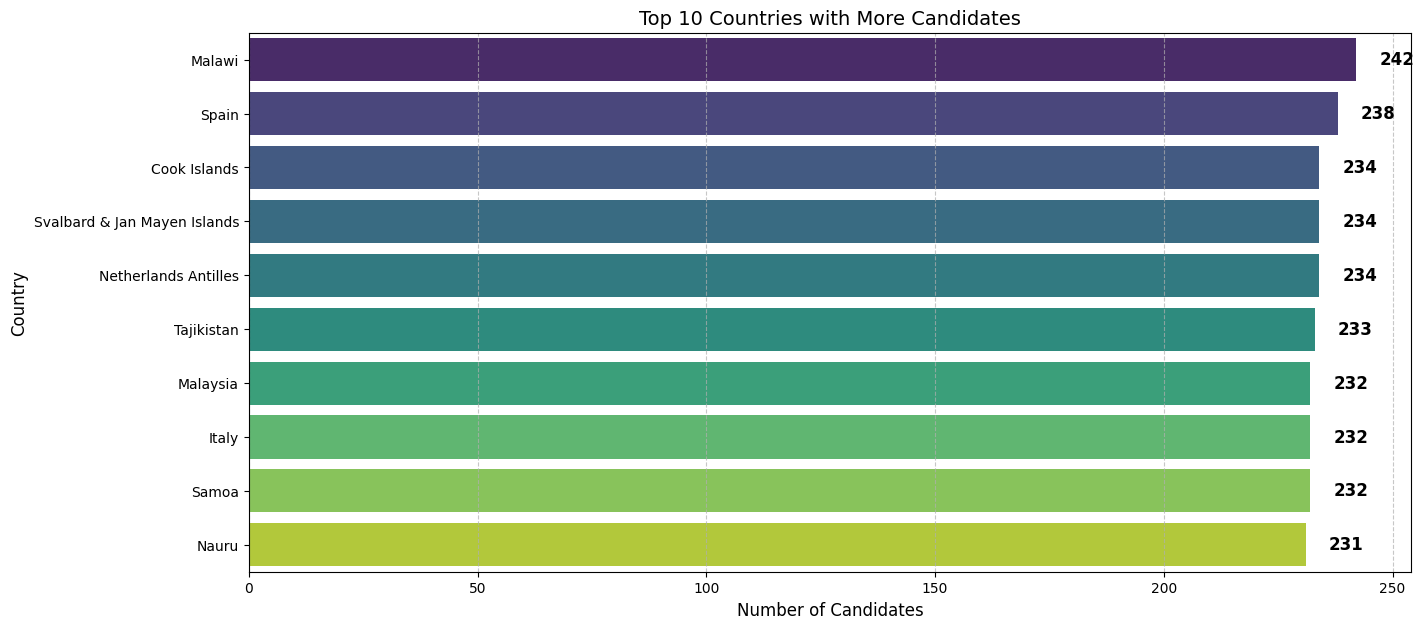

In [18]:

top_ten_countries = df["Country"].value_counts().nlargest(10)
plt.figure(figsize=(15, 7))
ax = sns.barplot(x=top_ten_countries.values, y=top_ten_countries.index, palette="viridis")

x_limit = ax.get_xlim()[1]
for index, value in enumerate(top_ten_countries.values):
    plt.text(min(value + x_limit * 0.02, x_limit - 5), index, str(value), va="center", fontsize=12, color="black", fontweight="bold")

plt.title("Top 10 Countries with More Candidates", fontsize=14)
plt.xlabel("Number of Candidates", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.7)

plt.show()



The country with the most candidates is Malawi with 242 candidates, followed by Spain with 238 candidates.

### Top 10 Most Popular Technologies

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19384\3184986298.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=tech_ten_counts.values, y=tech_ten_counts.index, palette="viridis")


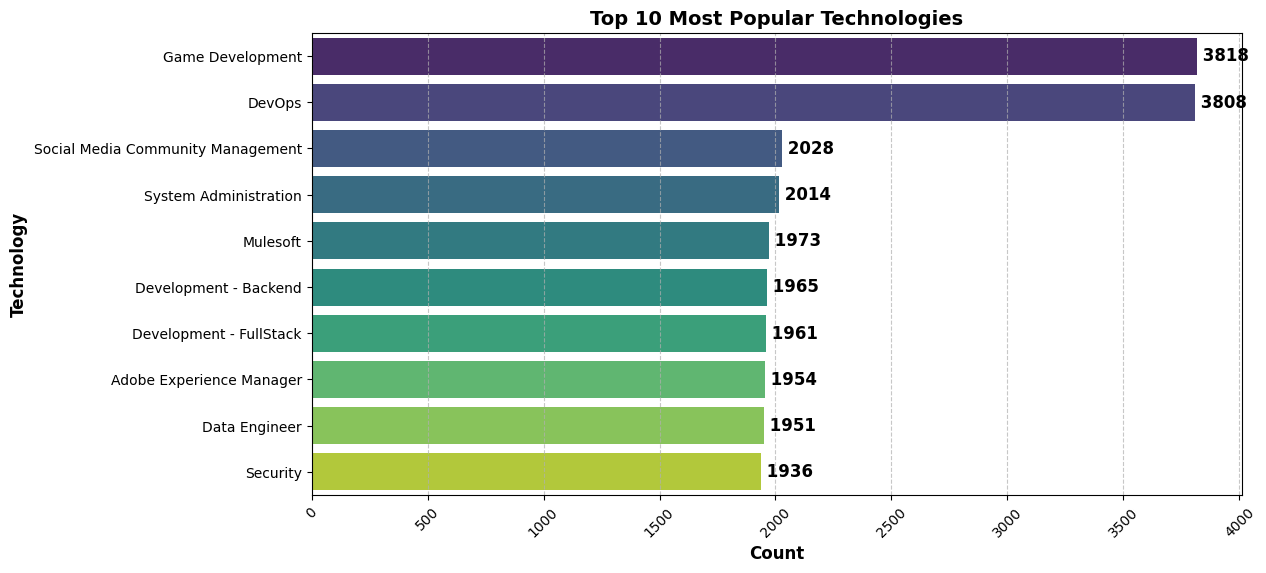

In [19]:
tech_ten_counts = df["Technology"].value_counts().head(10)

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=tech_ten_counts.values, y=tech_ten_counts.index, palette="viridis")

x_limit = ax.get_xlim()[1]

for index, value in enumerate(tech_ten_counts.values):
    plt.text(value, index, f" {value}", va="center", ha="left", fontsize=12, color="black", fontweight="bold")

plt.title("Top 10 Most Popular Technologies", fontsize=14, fontweight="bold")
plt.xlabel("Count", fontsize=12, fontweight="bold") 
plt.ylabel("Technology", fontsize=12, fontweight="bold")
plt.xticks(rotation=45)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.show()

The most popular technology is Game Development with 3818 mentions, followed by DevOps with 3808 mentions.

### conclusions:

After performing the visualizations, we realize that there are no outliers in the numerical variables. From 2018 to 2023, the number of candidates did not show much variation. However, in 2022 a drop is observed, possibly because not all the months of that year are registered.

In addition, when analyzing the most popular technologies, it stands out that Game Development and DevOps are the most demanded, with a significant difference with respect to the others. As for the countries with the most candidates, Malawi and Spain lead the list, followed by other nations with similar numbers. This suggests a relatively balanced distribution in the number of candidates per country, with no major extreme differences.

### visualizations with the hidesSataus columan

As the purpose of the project, we want to analyze which candidates were hired. To do this, it is essential to observe how the dataset behaves with this new “hiredStatus” column, which indicates whether a candidate was hired or not.

In [20]:
df["hiredStatus"] = (df["Code Challenge Score"] >= 7) & (df["Technical Interview Score"] >= 7)
df["hiredStatus"] = df["hiredStatus"].map({True: "Yes", False: "No"})


print(df.head())  

   First Name   Last Name                      Email Application Date  \
0  Bernadette   Langworth        leonard91@yahoo.com       2021-02-26   
1      Camryn    Reynolds        zelda56@hotmail.com       2021-09-09   
2       Larue      Spinka   okey_schultz41@gmail.com       2020-04-14   
3        Arch      Spinka     elvera_kulas@yahoo.com       2020-10-01   
4       Larue  Altenwerth  minnie.gislason@gmail.com       2020-05-20   

   Country  YOE  Seniority                         Technology  \
0   Norway    2     Intern                      Data Engineer   
1   Panama   10     Intern                      Data Engineer   
2  Belarus    4  Mid-Level                     Client Success   
3  Eritrea   25    Trainee                          QA Manual   
4  Myanmar   13  Mid-Level  Social Media Community Management   

   Code Challenge Score  Technical Interview Score hiredStatus  
0                     3                          3          No  
1                     2                 

### Hiring Status Distribution

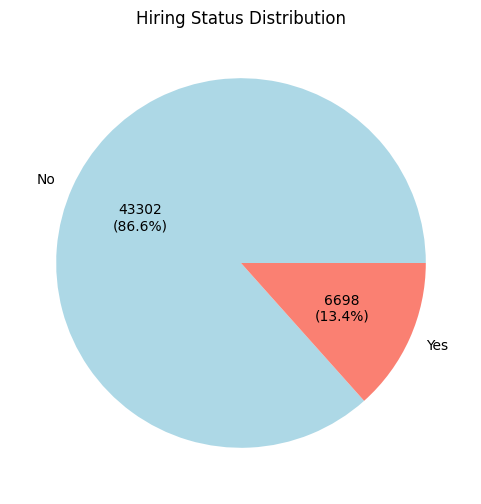

In [21]:
hired_counts = df["hiredStatus"].value_counts()

def func(pct, all_vals):
    absolute = int(round(pct/100. * sum(all_vals))) 
    return f"{absolute}\n({pct:.1f}%)"  

plt.figure(figsize=(6, 6))
plt.pie(hired_counts, labels=hired_counts.index, autopct=lambda pct: func(pct, hired_counts),
        colors=['lightblue', 'salmon'])
plt.title("Hiring Status Distribution")
plt.show()

With the pie chart, we observe that only 13.4% of the candidates were hired, equivalent to 6,698 people. Meanwhile, 86.6% of the candidates, or 43,302 people, were not hired. 

### Percentage of Candidates Hired per Technology Area

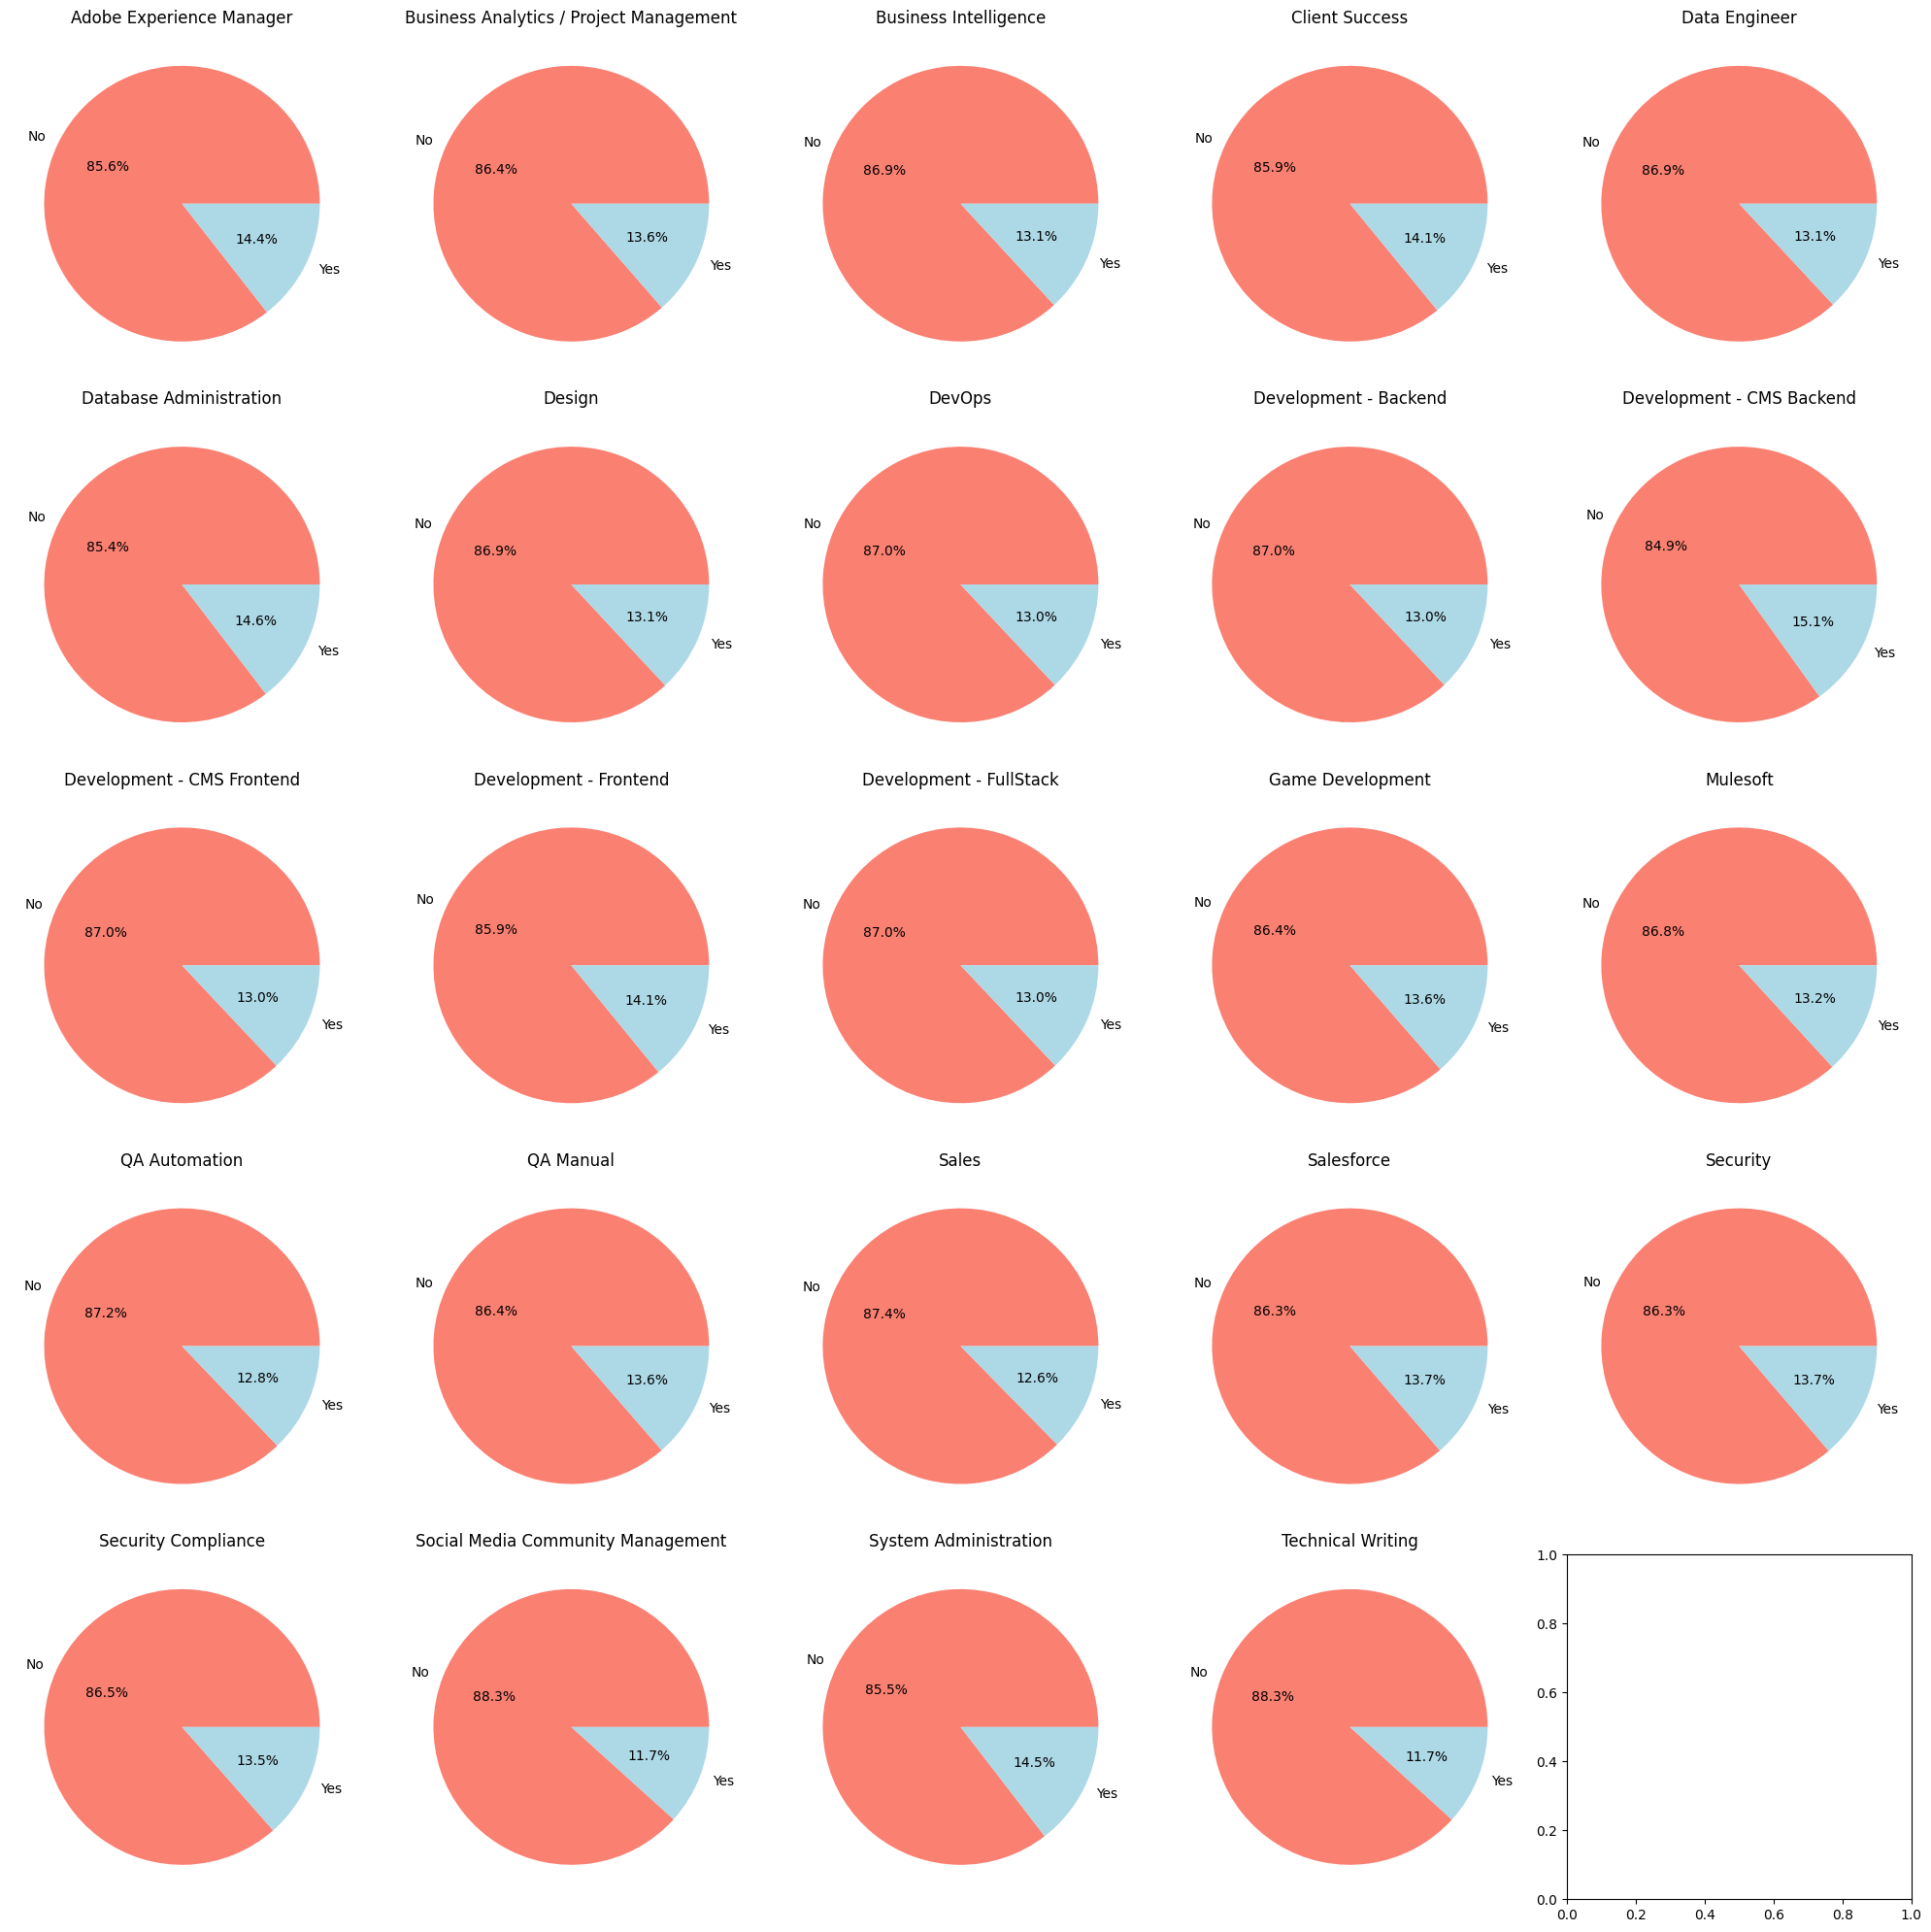

In [22]:

hired_by_tech = df.groupby(["Technology", "hiredStatus"]).size().unstack()
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))  
axes = axes.flatten()

for i, tech in enumerate(hired_by_tech.index):
    ax = axes[i]
    hired_by_tech.loc[tech].plot(kind="pie", autopct="%1.1f%%", colors=["salmon", "lightblue"], ax=ax)
    ax.set_title(tech)
    ax.set_ylabel("") 

plt.tight_layout()
plt.show()


The highest percentage of candidates hired corresponds to Development - CMS Backend, with 15.1% of hires in this technology. On the other hand, the lowest percentages are observed in Social Media Community Management and Technical Writing, with 11.7% of hires. The other technologies present percentages ranging between 12% and 14.6% of candidates hired.

##### creation of a dataframe of filtered recruited candidates

In [23]:
hired_df = df[df["hiredStatus"] == "Yes"]

### Distribution of Years of Experience Among Hired Candidates

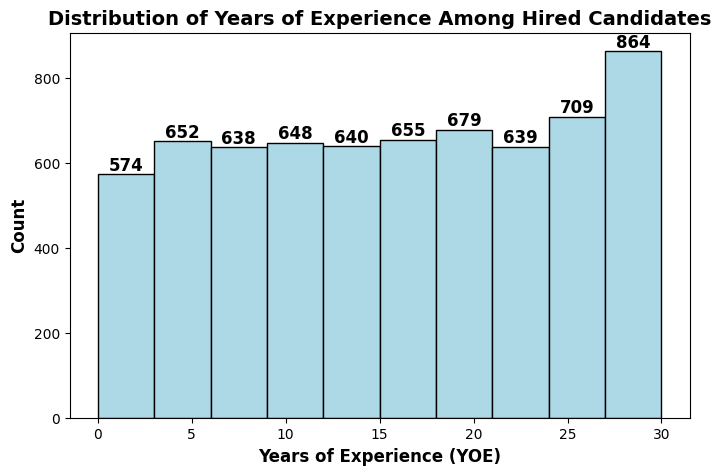

In [31]:
plt.figure(figsize=(8, 5))
counts, bins, patches = plt.hist(hired_df["YOE"], bins=10, color="lightblue", edgecolor="black")

for count, bin_edge in zip(counts, bins[:-1]):
    plt.text(bin_edge + (bins[1] - bins[0]) / 2, count, int(count), ha="center", va="bottom", fontsize=12, color="black", fontweight="bold")

plt.xlabel("Years of Experience (YOE)", fontsize=12, fontweight="bold")
plt.ylabel("Count", fontsize=12, fontweight="bold")
plt.title("Distribution of Years of Experience Among Hired Candidates", fontsize=14, fontweight="bold")
plt.show()



People with 26 to 30 years of experience had the highest number of hires.

### Most Common Technologies Among Hired Candidates

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19384\2938518712.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=hired_df, y="Technology", order=hired_df["Technology"].value_counts().index, palette="Blues_r")


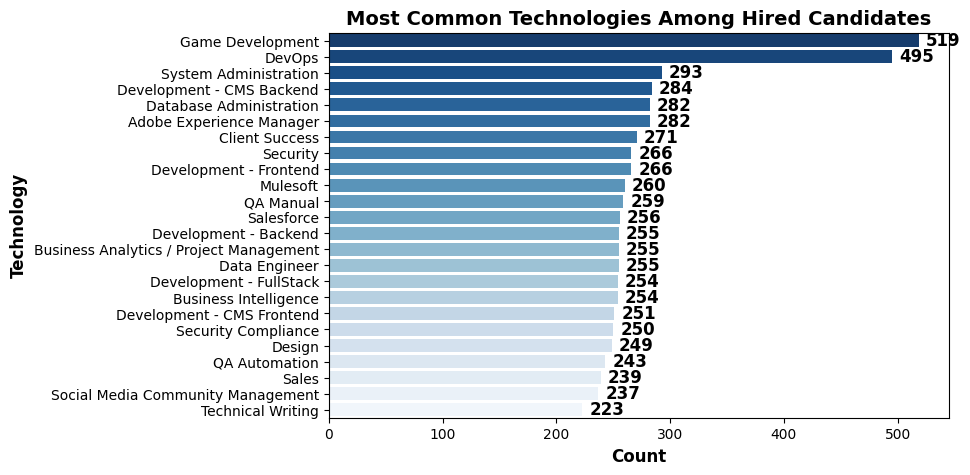

In [33]:
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=hired_df, y="Technology", order=hired_df["Technology"].value_counts().index, palette="Blues_r")

for p in ax.patches:
    ax.annotate(f"{int(p.get_width())}", 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha="left", va="center", fontsize=12, color="black", fontweight="bold", xytext=(5, 0), 
                textcoords="offset points")
    
plt.title("Most Common Technologies Among Hired Candidates", fontsize=14, fontweight="bold")
plt.xlabel("Count", fontsize=12, fontweight="bold")
plt.ylabel("Technology", fontsize=12, fontweight="bold")
plt.show()



The chart shows that the technology with the most hires was “Game Development”, with 519 candidates hired.
“DevOps” ranked second with 495 hires.

### Distribution of Years of Experience Among Hired Candidates

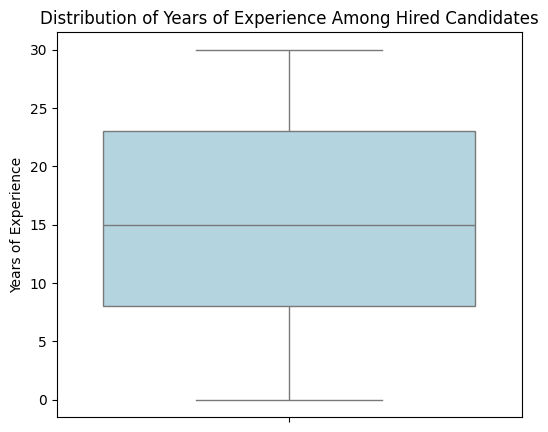

In [26]:
plt.figure(figsize=(6, 5))
sns.boxplot(y=hired_df["YOE"], color="lightblue")
plt.title("Distribution of Years of Experience Among Hired Candidates")
plt.ylabel("Years of Experience")
plt.show()


The median of 15 years suggests that most of the candidates hired have moderate experience. The interquartile range (IQR) indicates that the majority have between 8 and 22 years of experience. There is a symmetric distribution with no outliers, suggesting that there is not a large spread in the data Although there are hires with little experience (0 years) and also with a lot of experience (30 years), the majority of candidates hired have between 8 and 22 years.

### Top 10 Countries for Hired Candidates

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19384\2174900819.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=top_countries_df, y="Country", x="Count", palette="Greens_r")


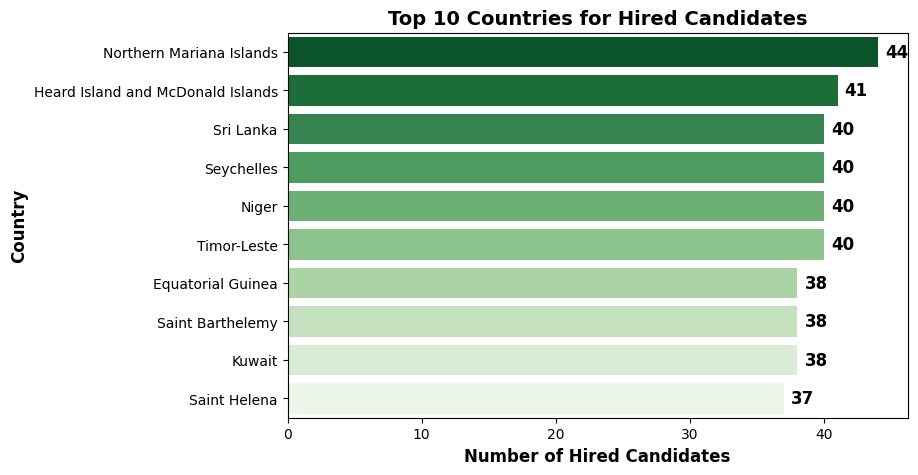

In [34]:
top_ten_countries_hires = hired_df["Country"].value_counts().nlargest(10)

top_countries_df = top_ten_countries_hires.reset_index()
top_countries_df.columns = ["Country", "Count"]

plt.figure(figsize=(8, 5))

ax = sns.barplot(data=top_countries_df, y="Country", x="Count", palette="Greens_r")

for p in ax.patches:
    ax.annotate(f"{int(p.get_width())}", 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha="left", va="center", fontsize=12, color="black", fontweight="bold", xytext=(5, 0), 
                textcoords="offset points")

# Etiquetas y título
plt.title("Top 10 Countries for Hired Candidates", fontsize=14, fontweight="bold")
plt.xlabel("Number of Hired Candidates", fontsize=12, fontweight="bold")
plt.ylabel("Country", fontsize=12, fontweight="bold")

# Mostrar la gráfica
plt.show()


The graph shows that hiring is distributed in different countries, but “Northern Mariana Islands” stands out as the main country with the most candidates hired, with more than 40 people employed. 

### Number of Hired Candidates by Seniority Level

C:\Users\ASUS\AppData\Local\Temp\ipykernel_19384\4136833086.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=seniority_counts.index, y=seniority_counts.values, palette="Blues_r")


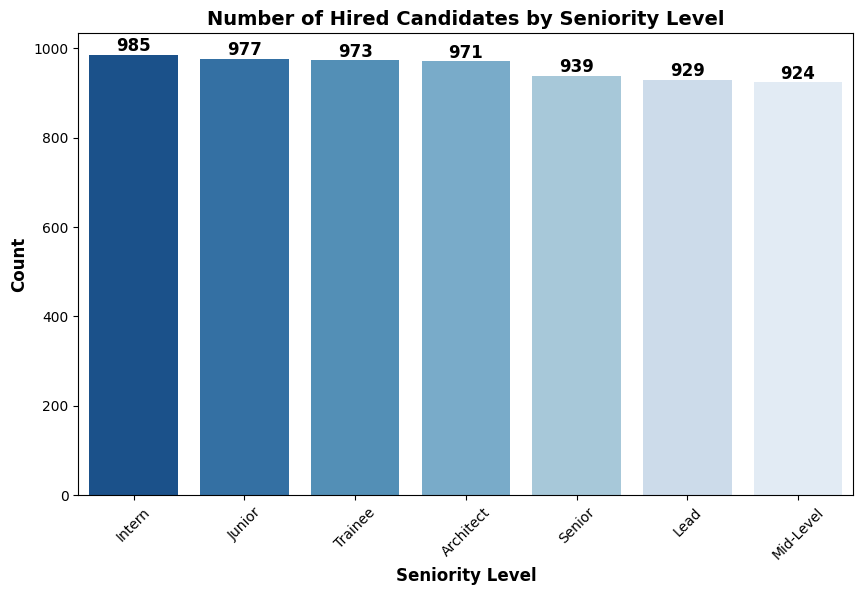

In [37]:
seniority_counts = hired_df["Seniority"].value_counts()

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=seniority_counts.index, y=seniority_counts.values, palette="Blues_r")

for p in ax.patches:
    ax.annotate(f"{int(p.get_height())}", 
                (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha="center", va="bottom", fontsize=12, color="black", fontweight="bold")
plt.title("Number of Hired Candidates by Seniority Level", fontsize=14, fontweight="bold")
plt.xlabel("Seniority Level", fontsize=12, fontweight="bold")
plt.ylabel("Count", fontsize=12, fontweight="bold")
plt.xticks(rotation=45) 
plt.show()


The graph shows the number of candidates hired according to their seniority level. It can be seen that most of the hires correspond to Interns (985), Juniors (977) and Trainees (973). As the seniority level increases, the number of hires tends to decrease, with Mid-Level (924) and Lead (929) being the least hired.

#### Conclusions: 

13.4% of the candidates applied were hired, out of 5000 candidates only 6698 passed, this gives us an indication that the tests that were done were difficult.
Most demanded technologies:
Game Development (519 hires) and DevOps (495 hires) were the areas with the highest demand.
Other areas with many hires include System Administration, CMS Backend and Database Administration.
Most Hired Seniority Level:
The levels with the most hires were Intern (985), Junior (977) and Trainee (973).
Higher levels such as Senior (939), Lead (929) and Mid-Level (924) had a lower number of hires.
Countries with more hires:
The country with the most hires was Northern Mariana ISlands.
with an average of 15 years of experience

The most hired profile is a candidate in junior or entry-level positions, especially in Game Development and DevOps areas. In addition, System Administration and Backend Development roles were also highly demanded.